In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
housing_df = pd.read_csv('kc_house_data.csv') 
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<b>Data Understanding</b>

In [4]:
#understand the data
housing_df.shape

(21613, 21)

In [5]:
#statistical information
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
#data types
housing_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

From checking on the data types the data data type is an object and so therefore when working on the dataset the data type would bring alot more error so if we are to use that column we would gave to convert the column date to data type datetime and so in my case I don't need the column so i would just drop it

Data Cleaning

In [7]:
#checking for null values
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#drop unwanted column
housing_df = housing_df.drop(['id','zipcode','date'],axis=1)
housing_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


<b>Explanatory Data Analysis

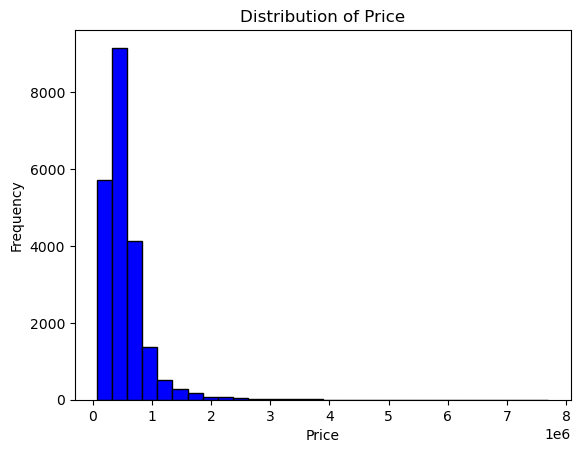

In [11]:
#summary satistics for the "price" column 
housing_df['price'].describe()

plt.hist(housing_df['price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The distribution of the "price" column is positively skewed

In [12]:
housing_df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Standard Deviation (std): 367127.196483
The standard deviation is approximately $367,127.20, indicating a significant amount of variability in the prices.

Minimum (min): 75000.0
The minimum value is the smallest observed value in my dataset. The lowest price in this dataset is $75,000.

25th Percentile (25%): 321950.0
25% of the prices are below $321,950.

Median (50%): 450000.0
The median, or 50th percentile, is the middle value of the dataset when it is sorted in ascending order. In this case, the median price is $450,000.

75th Percentile (75%): 645000.0
The 75th percentile, or third quartile, is the value below which 75% of the data falls. In this dataset, 75% of the prices are below $645,000.

Maximum (max): 7700000.0
The maximum value is the highest observed value in your dataset. The highest price in this dataset is $7,700,000.

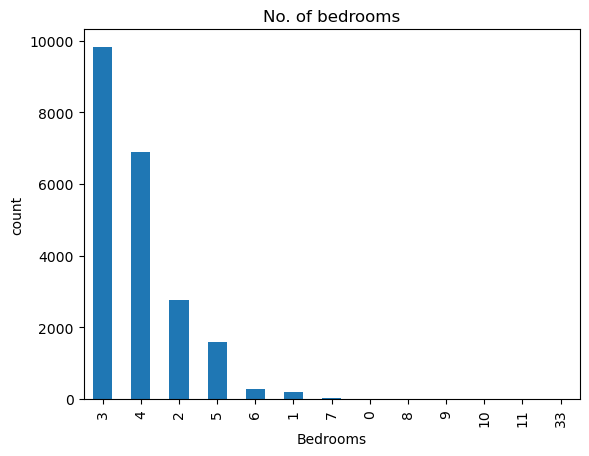

In [13]:
#Number of bedrooms
housing_df['bedrooms'].value_counts().plot(kind='bar')
plt.title('No. of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('count')

plt.show()

From the graph we can see that most of the houses had 3 bedrooms then followed by 4 bedrooms

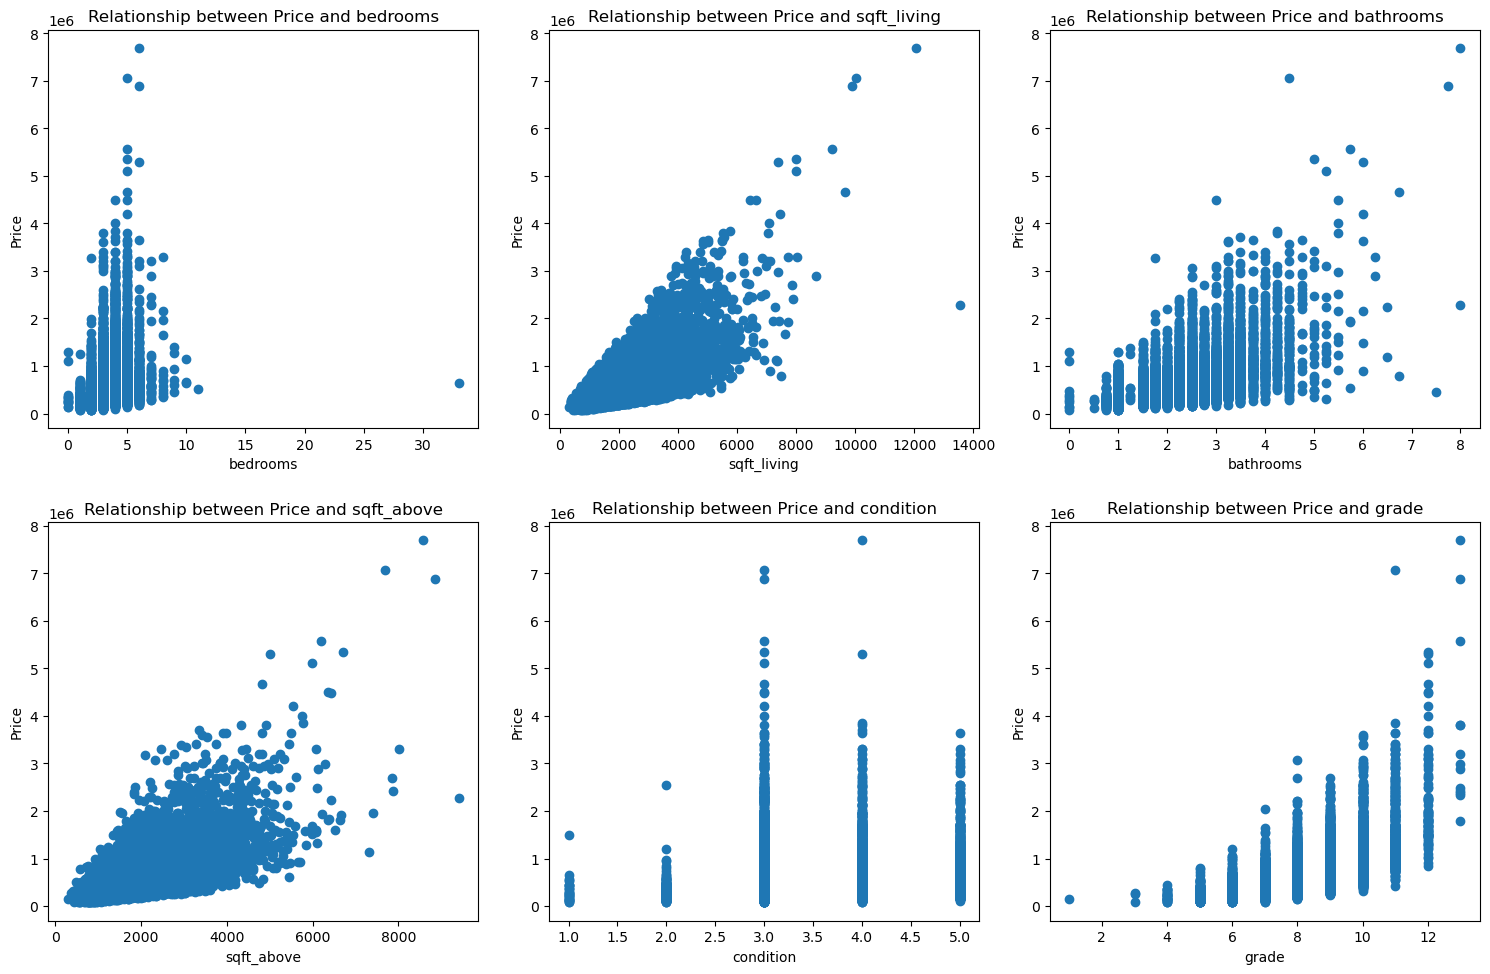

In [14]:
#relationships between our target variable and other independent variables in the dataset
import math

variables = ['bedrooms','sqft_living','bathrooms','sqft_above','condition','grade']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(housing_df[var],housing_df['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()

From the scatter plots, we can see how the "price" is distributed based on its relationship with the other features.

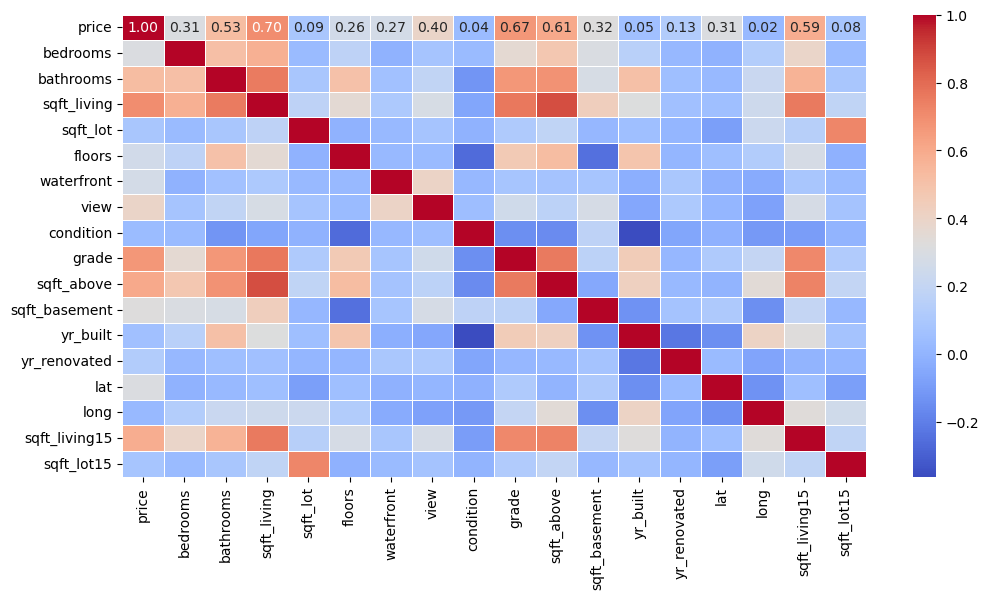

In [15]:
#Multivariate analysis
correlation_matrix = housing_df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm', fmt='.2f')
plt.show()

From the heatmap, cool colors are lowly correlated whereas dark colors are highly correlated. For instance sqft_living is highly correlated and also sqft_above is also highly correlated

<b>Data Modelling<b>

Using Linear Regression Model as my baseline model

In [16]:
#target variable and the feature varaible
X= housing_df.drop('price', axis=1) #feature varaible
y = housing_df['price'] #target variable

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Data Scaling
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform the test data using the previously fitted scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#instantiate my model
logreg = LinearRegression()

#fit the model
logreg.fit(X_train_scaled, y_train)

#predict
y_pred = logreg.predict(X_test_scaled)

print("The r2_score is:", r2_score(y_test, y_pred))
print("The MSE IS :", mean_squared_error(y_test , y_pred))
print("The RMSE is :", np.sqrt(mean_squared_error(y_test , y_pred)))

The r2_score is: 0.6957298370207375
The MSE IS : 45998562877.06282
The RMSE is : 214472.75555898194


Based on my model, the score is 69% and it isn't that accurate so therefore I would try a different model and see what accuracy I will get

Random Forest as my comparison model

In [18]:

#instantiate the model
clf = RandomForestRegressor()

#fit the model
clf.fit(X_train_scaled, y_train)

#predict
y_pred = clf.predict(X_test_scaled)

mse =  mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("The mse is :", mse)
print("The r2 score is :", score)
print("The RMSE is :", np.sqrt(mse))

The mse is : 22625079694.195843
The r2 score is : 0.8503401790101459
The RMSE is : 150416.35447715066


From the model I used, I got the score to be 85% which seems to be a better fit for my case